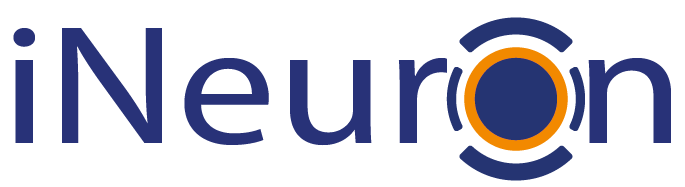




Mushroom Classification

EDA - Exploratory Data Analysis

Domain - Agriculture

Author - KUNAL CHOPDE 

Problem Statement :
The Audubon Society Field Guide to North American Mushrooms contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either definitely edible, definitely poisonous, or maybe edible but not recommended. This last category was merged with the toxic category. The Guide asserts unequivocally that there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it be" for Poisonous Oak and Ivy. The main goal is to predict which mushroom is poisonous & which is edibl

In [38]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [39]:
df=pd.read_csv("mushroom.csv")

In [40]:
# Remove commas from the entire DataFrame
df = df.apply(lambda x: x.str.replace("'", ""))

# Display the updated DataFrame
print(df)


     cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0            x           s         n          t    p               f   
1            x           s         y          t    a               f   
2            b           s         w          t    l               f   
3            x           y         w          t    p               f   
4            x           s         g          f    n               f   
...        ...         ...       ...        ...  ...             ...   
8119         k           s         n          f    n               a   
8120         x           s         n          f    n               a   
8121         f           s         n          f    n               a   
8122         k           y         n          f    y               f   
8123         x           s         n          f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c

In [41]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


INFORMATION ABOUT THE ATTRIBUTES

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

We will replace these values with the original column values to understand data better.

In [42]:
# Remove extra characters from column names
df.columns = df.columns.str.replace('%3F', '')

# Replace values
df = df.replace({
    "class":{'e':'edible','p':'poisonous'},
    "cap-shape":{'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'},
    "cap-surface":{'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'},
    "cap-color":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
    "bruises":{'t':'yes','f':'no'},
    "odor":{'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'},
    "gill-attachment":{'a':'attached','d':'descending','f':'free','n':'notched'},
    "gill-spacing":{'c':'close','w':'crowded','d':'distant'},
    "gill-size":{'b':'broad','n':'narrow'},
    "gill-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red',
                  'w':'white','y':'yellow'},
    "stalk-shape":{'e':'enlarging','t':'tapering'},
    "stalk-root":{'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted'},
    "stalk-surface-above-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-surface-below-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-color-above-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "stalk-color-below-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "veil-type":{'p':'partial','u':'universal'},
    "veil-color":{'n':'brown','o':'orange','w':'white','y':'yellow'},
    "ring-number":{'n':'none','o':'one','t':'two'},
    "ring-type":{'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'},
    "spore-print-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'},
    "population":{'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'},
    "habitat":{'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}  
})

print(df.head())



  cap-shape cap-surface cap-color bruises     odor gill-attachment  \
0    convex      smooth     brown     yes  pungent            free   
1    convex      smooth    yellow     yes   almond            free   
2      bell      smooth     white     yes    anise            free   
3    convex       scaly     white     yes  pungent            free   
4    convex      smooth      gray      no     none            free   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0        close    narrow      black   enlarging  ...                  white   
1        close     broad      black   enlarging  ...                  white   
2        close     broad      brown   enlarging  ...                  white   
3        close    narrow      brown   enlarging  ...                  white   
4      crowded     broad      black    tapering  ...                  white   

  stalk-color-below-ring veil-type veil-color ring-number   ring-type  \
0                  white   part

In [43]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,convex,smooth,brown,yes,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,yes,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,yes,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,yes,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,edible


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [45]:
#checking for duplicate value 
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [46]:
#checking for duplicate value 
df.duplicated().sum()


#so we donot found any duplicate value in dataset

0

In [47]:
for i in df.columns:
    missing = df[i][df[i]=='?'].count()
    if missing != 0:
        print(i, missing)

stalk-root 2480


In [48]:
df['stalk-root'] = df['stalk-root'].replace(to_replace='?',value=np.nan)

In [49]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [50]:
# import simple imputer
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [51]:
#The .flatten() method converts the 2D array into a 1D array, which can then be properly assigned to a DataFrame column
df['stalk-root'] = impute.fit_transform(df[['stalk-root']]).flatten()


In [52]:
df['veil-type'].unique()

array(['partial'], dtype=object)

In [53]:
#checking unique value in dataset 
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print("\n")

In [54]:
check_unique_values(df)

Unique values in column 'cap-shape':
['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']


Unique values in column 'cap-surface':
['smooth' 'scaly' 'fibrous' 'grooves']


Unique values in column 'cap-color':
['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']


Unique values in column 'bruises':
['yes' 'no']


Unique values in column 'odor':
['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']


Unique values in column 'gill-attachment':
['free' 'attached']


Unique values in column 'gill-spacing':
['close' 'crowded']


Unique values in column 'gill-size':
['narrow' 'broad']


Unique values in column 'gill-color':
['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']


Unique values in column 'stalk-shape':
['enlarging' 'tapering']


Unique values in column 'stalk-root':
['equal' 'club' 'bulbous' 'rooted']


Unique values in column 'stalk-surface-above-ring':
['smooth' 'fibrous' 's

In [55]:
#from above we can see that veil-type only one value so we can drop it 
df.drop(labels=['veil-type'],axis=1)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,convex,smooth,brown,yes,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,white,one,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,yes,almond,free,close,broad,black,enlarging,...,smooth,white,white,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,yes,anise,free,close,broad,brown,enlarging,...,smooth,white,white,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,yes,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,white,one,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,smooth,white,white,white,one,evanescent,brown,abundant,grasses,edible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves,edible
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,smooth,orange,orange,brown,one,pendant,buff,several,leaves,edible
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,...,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves,edible
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,...,silky,white,white,white,one,evanescent,white,several,leaves,poisonous


In [56]:
df.to_csv('mushroom2.csv',index=True,header=True)

In [57]:
df['class'].value_counts()

class
edible       4208
poisonous    3916
Name: count, dtype: int64

In [58]:
class_map={'edible':0,'poisonous':1}

In [59]:
df['class']=df['class'].map(class_map)

ANALYSIS


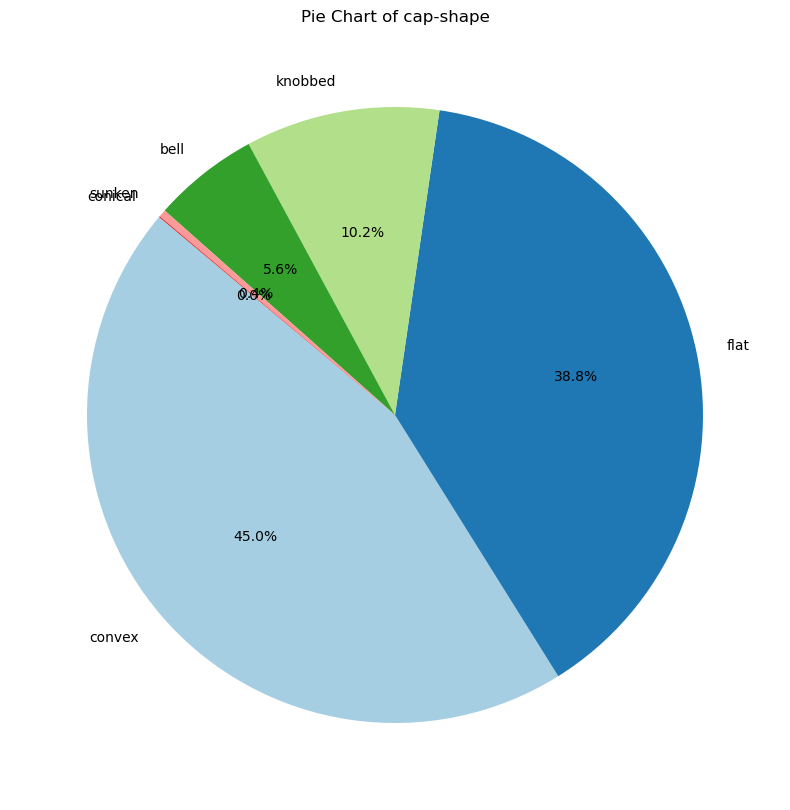

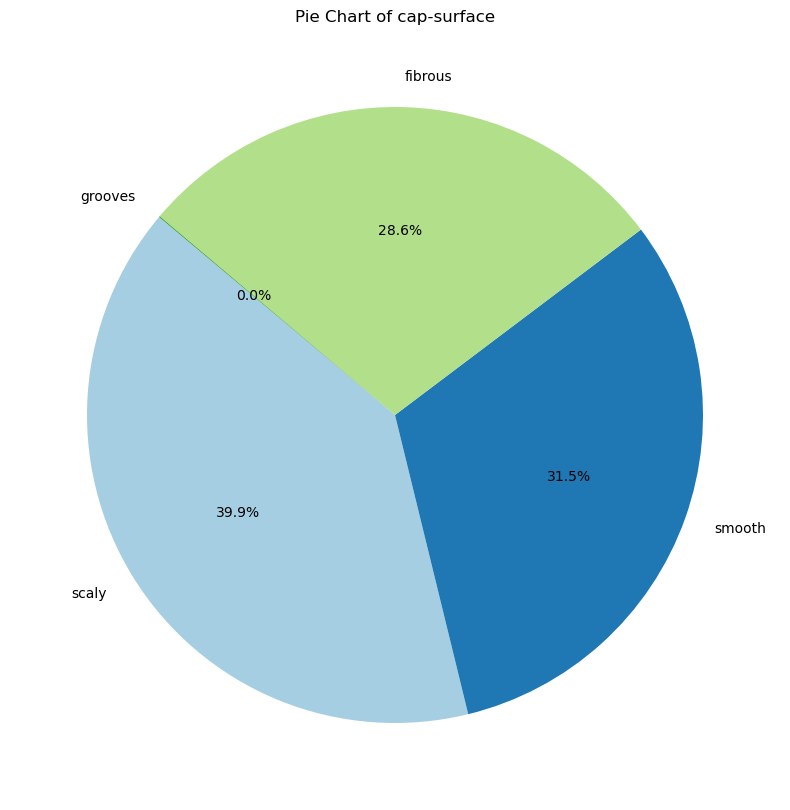

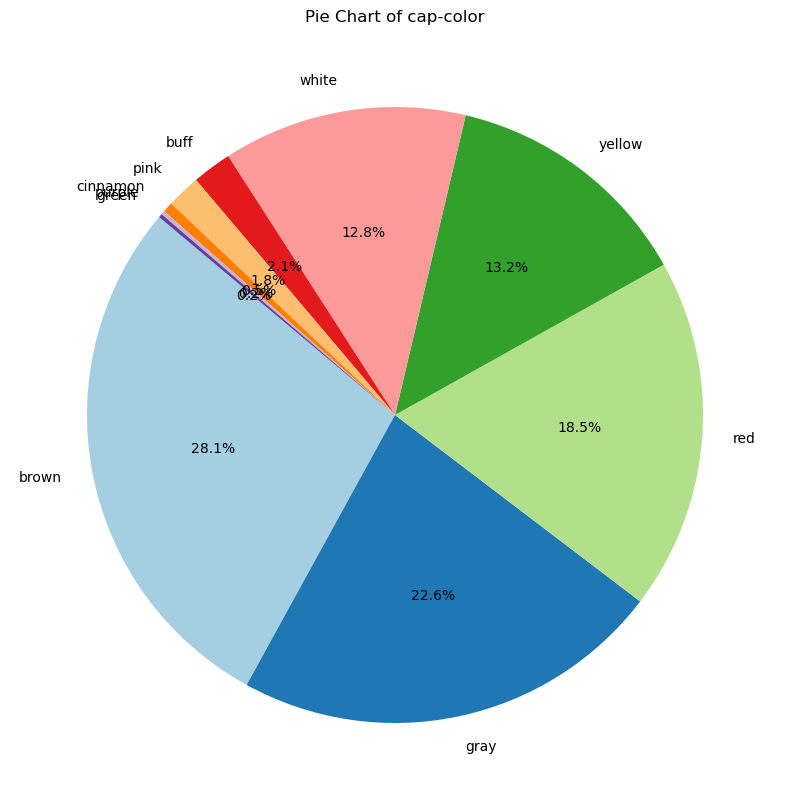

In [60]:

def plot_pie_chart(df, column):
    # Calculate the value counts for the categorical feature
    value_counts = df[column].value_counts()

    # Plot the pie chart
    plt.figure(figsize=(10, 10))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(value_counts))))
    plt.title(f'Pie Chart of {column}')
    plt.show()


plot_pie_chart(df, 'cap-shape')
plot_pie_chart(df, 'cap-surface')
plot_pie_chart(df, 'cap-color')


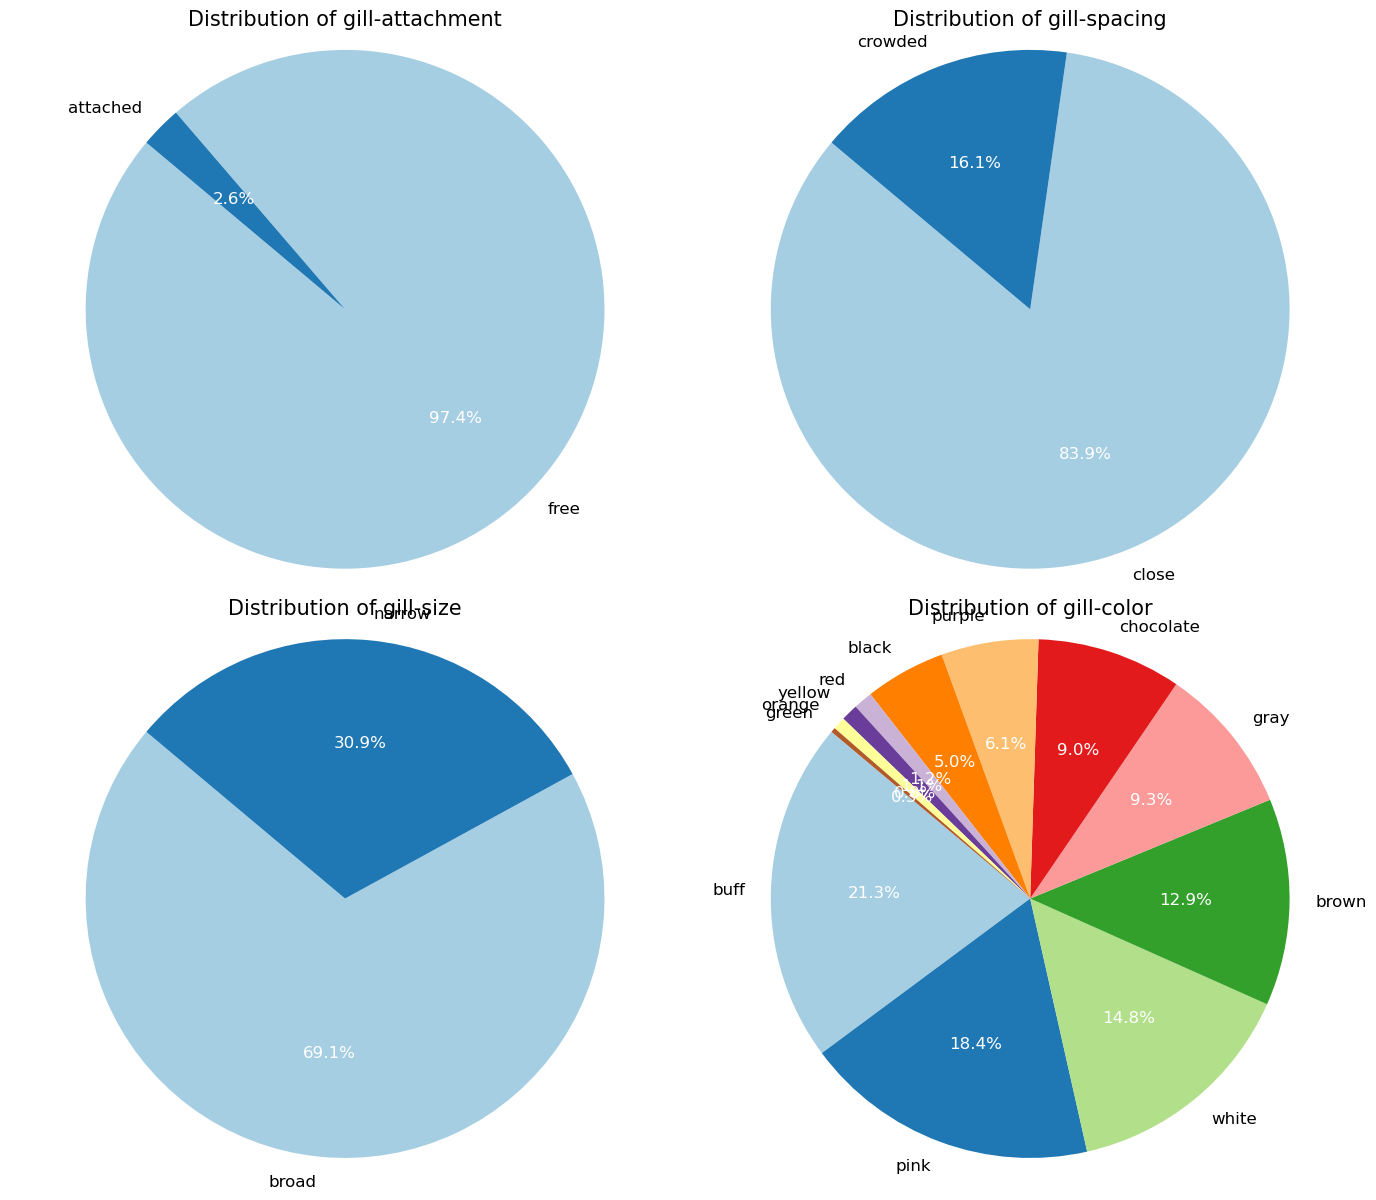

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie_chart(df, column):
    # Calculate the value counts for the categorical feature
    value_counts = df[column].value_counts()
    
    # Define a color palette
    colors = plt.cm.Paired(range(len(value_counts)))
    
    # Plot the pie chart
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    
    # Improve the aesthetics
    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
    
    plt.title(f'Distribution of {column}', fontsize=15)
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()

def plot_multiple_pie_charts(df, columns):
    num_columns = len(columns)
    
    # Determine the grid size for subplots
    rows = (num_columns + 1) // 2  # Calculate rows needed for a 2-column layout
    
    # Set up the subplot grid
    fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 6))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each pie chart
    for i, column in enumerate(columns):
        value_counts = df[column].value_counts()
        colors = plt.cm.Paired(range(len(value_counts)))
        
        wedges, texts, autotexts = axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        
        for text in texts:
            text.set_fontsize(12)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontsize(12)
        
        axes[i].set_title(f'Distribution of {column}', fontsize=15)
        axes[i].axis('equal')
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
# df = pd.read_csv('your_dataset.csv')  # Load your DataFrame
columns_to_plot = ['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']
plot_multiple_pie_charts(df, columns_to_plot)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

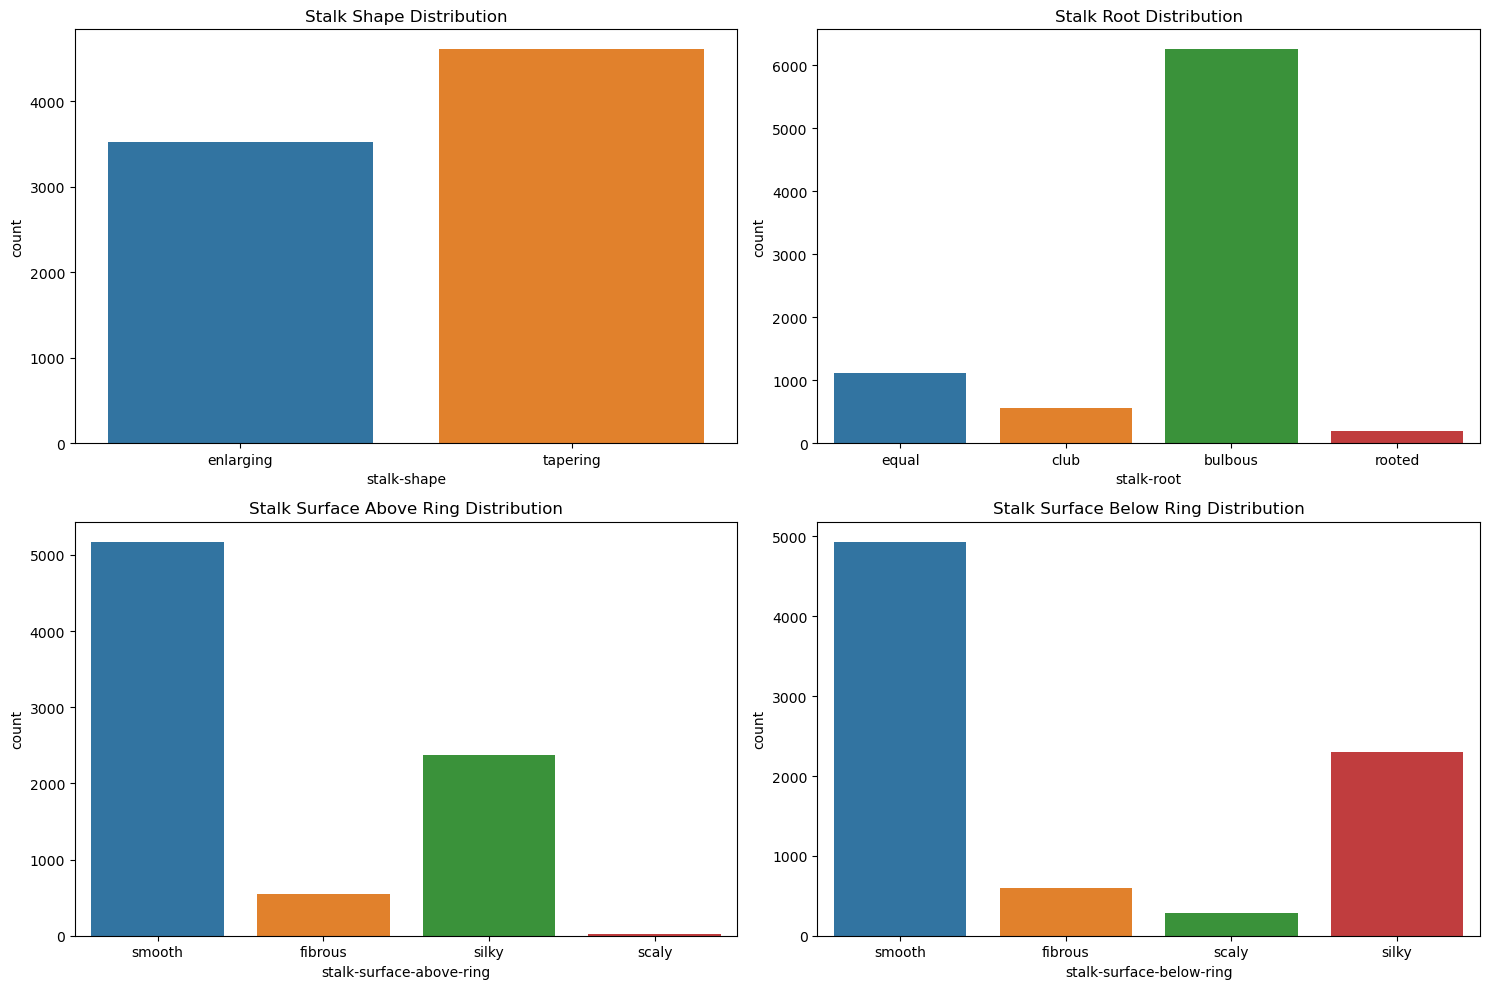

In [64]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Stalk-shape
sns.countplot(ax=axes[0, 0], x='stalk-shape', data=df)
axes[0, 0].set_title('Stalk Shape Distribution')

# Stalk-root
sns.countplot(ax=axes[0, 1], x='stalk-root', data=df)
axes[0, 1].set_title('Stalk Root Distribution')

# Stalk-surface-above-ring
sns.countplot(ax=axes[1, 0], x='stalk-surface-above-ring', data=df)
axes[1, 0].set_title('Stalk Surface Above Ring Distribution')

# Stalk-surface-below-ring
sns.countplot(ax=axes[1, 1], x='stalk-surface-below-ring', data=df)
axes[1, 1].set_title('Stalk Surface Below Ring Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

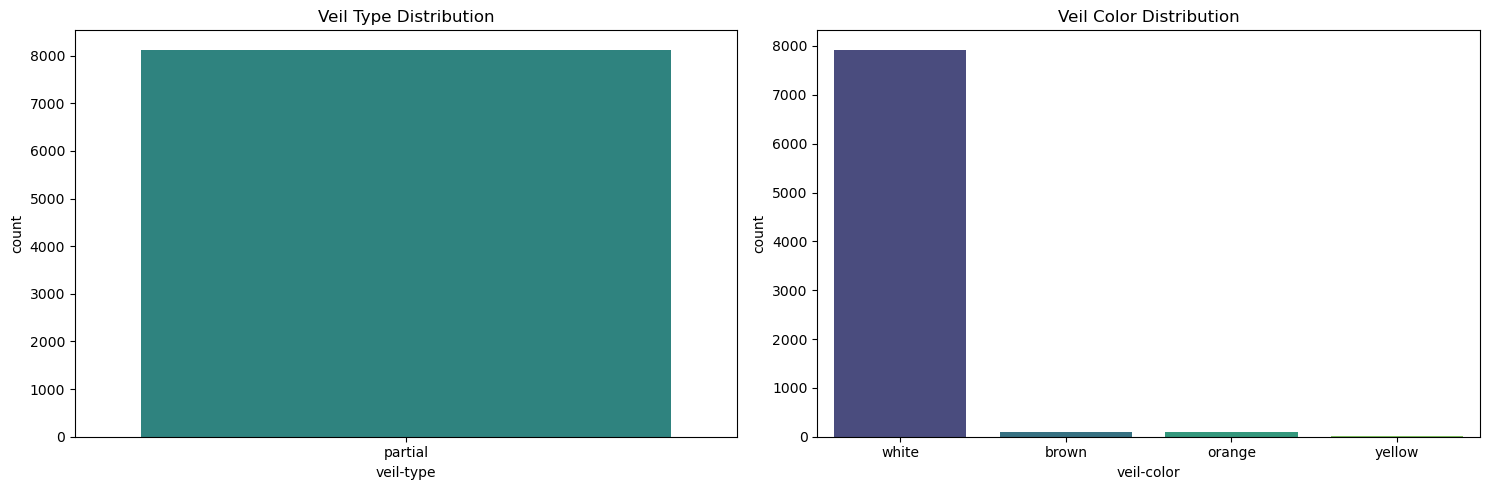

In [65]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Veil-type
sns.countplot(ax=axes[0], x='veil-type', data=df, palette='viridis')
axes[0].set_title('Veil Type Distribution')

# Veil-color
sns.countplot(ax=axes[1], x='veil-color', data=df, palette='viridis')
axes[1].set_title('Veil Color Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

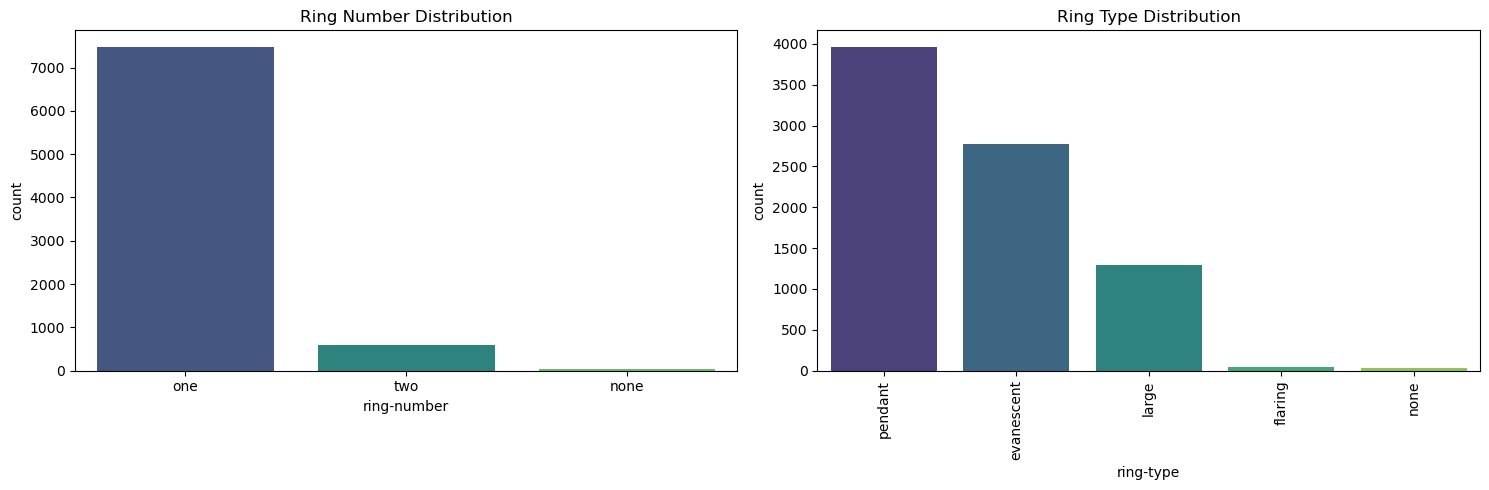

In [69]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Ring-number
sns.countplot(ax=axes[0], x='ring-number', data=df, palette='viridis')
axes[0].set_title('Ring Number Distribution')

# Ring-type
sns.countplot(ax=axes[1], x='ring-type', data=df, palette='viridis')
axes[1].set_title('Ring Type Distribution')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x labels if necessary

# Adjust layout
plt.tight_layout()
plt.show()

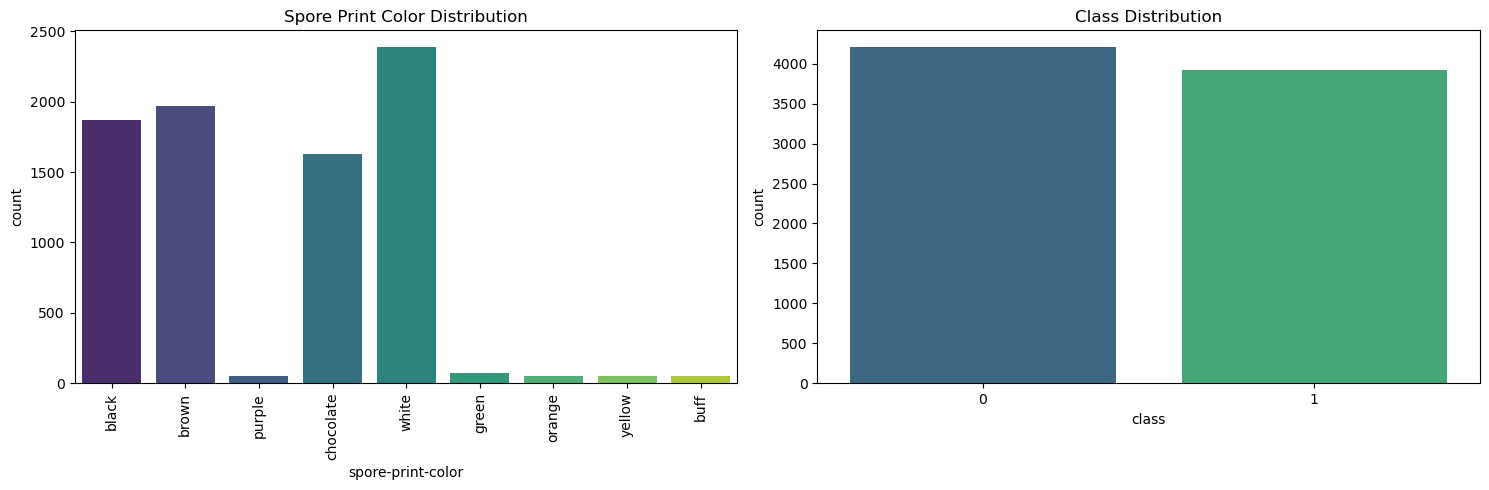

In [70]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Spore-print-color
sns.countplot(ax=axes[0], x='spore-print-color', data=df, palette='viridis')
axes[0].set_title('Spore Print Color Distribution')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x labels if necessary

# Class
sns.countplot(ax=axes[1], x='class', data=df, palette='viridis')
axes[1].set_title('Class Distribution')

# Adjust layout
plt.tight_layout()
plt.show()